In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Specify the path to the downloaded dataset file on your local machine
file_path = "breast+cancer+wisconsin+original/breast-cancer-wisconsin.data"

In [3]:
# Define column names for the dataset
column_names = ["Sample_Code_Number", "Clump_Thickness", "Uniformity_of_Cell_Size", "Uniformity_of_Cell_Shape",
                "Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli",
                "Mitoses", "Class"]

In [4]:
# Read the dataset file into a pandas DataFrame
df = pd.read_csv(file_path, names=column_names)

In [5]:
# Remove rows with missing values ('?') in the "Bare Nuclei" column
df = df[df['Bare_Nuclei'] != '?']

In [6]:
# Reset the index of the DataFrame after removing rows
df = df.reset_index(drop=True)

In [7]:
# Remove the "Sample Code Number" column
df.drop("Sample_Code_Number", axis=1, inplace=True)

In [8]:
# Replace 2 with 0 and 4 with 1 in the 'Class' column
df['Class'] = df['Class'].replace({2: 0, 4: 1})

In [9]:
# Prepare the Data
# Separate features and target variable
X = df.drop("Class", axis=1)  # Features
y = df["Class"]  # Target variable

In [10]:
# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

In [15]:
# Specify the number of cross-validation folds (K) - e.g., 5-fold cross-validation
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)

In [16]:
# Perform K-fold cross-validation and get the classification scores
scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')

In [17]:
# Print the accuracy for each fold
print("Cross-Validation Accuracy Scores:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.6f}")

Cross-Validation Accuracy Scores:
Fold 1: 0.985401
Fold 2: 0.970803
Fold 3: 0.970803
Fold 4: 0.970588
Fold 5: 0.977941


In [18]:
# Calculate and print the mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.6f}")
print(f"Standard Deviation: {std_accuracy:.6f}")

Mean Accuracy: 0.975107
Standard Deviation: 0.005856


#### Random State Loop

In [15]:
# Specify a range of random states to consider
random_states = list(range(101))  # Add more random states as needed

In [16]:
# Initialize lists to store results
mean_accuracies = []
std_accuracies = []

In [17]:
# Loop through random states and perform cross-validation
for random_state in random_states:
    # Specify the number of cross-validation folds (e.g., 5-fold cross-validation)
    n_splits = 5
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Perform K-fold cross-validation and get the classification scores
    scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
    
    # Calculate mean and standard deviation of accuracy
    mean_accuracy = np.mean(scores)
    std_accuracy = np.std(scores)
    
    # Append results to lists
    mean_accuracies.append(mean_accuracy)
    std_accuracies.append(std_accuracy)
    
    # Print results for the current random state
    print(f"Random State {random_state}:")
    print("Cross-Validation Accuracy Scores:")
    for i, score in enumerate(scores):
        print(f"Fold {i+1}: {score:.6f}")
    print(f"Mean Accuracy: {mean_accuracy:.6f}")
    print(f"Standard Deviation: {std_accuracy:.6f}")
    print()

# Print the mean and standard deviation across random states
print("Mean Accuracy Across Random States:")
for i, random_state in enumerate(random_states):
    print(f"Random State {random_state}: {mean_accuracies[i]:.6f}")
print()
print("Standard Deviation Across Random States:")
for i, random_state in enumerate(random_states):
    print(f"Random State {random_state}: {std_accuracies[i]:.6f}")

Random State 0:
Cross-Validation Accuracy Scores:
Fold 1: 0.992701
Fold 2: 0.963504
Fold 3: 0.963504
Fold 4: 0.955882
Fold 5: 0.977941
Mean Accuracy: 0.970706
Standard Deviation: 0.013112

Random State 1:
Cross-Validation Accuracy Scores:
Fold 1: 0.985401
Fold 2: 0.970803
Fold 3: 0.970803
Fold 4: 0.970588
Fold 5: 0.977941
Mean Accuracy: 0.975107
Standard Deviation: 0.005856

Random State 2:
Cross-Validation Accuracy Scores:
Fold 1: 0.970803
Fold 2: 0.985401
Fold 3: 0.970803
Fold 4: 0.955882
Fold 5: 0.963235
Mean Accuracy: 0.969225
Standard Deviation: 0.009804

Random State 3:
Cross-Validation Accuracy Scores:
Fold 1: 0.948905
Fold 2: 0.963504
Fold 3: 0.941606
Fold 4: 1.000000
Fold 5: 0.977941
Mean Accuracy: 0.966391
Standard Deviation: 0.020935

Random State 4:
Cross-Validation Accuracy Scores:
Fold 1: 0.970803
Fold 2: 0.978102
Fold 3: 0.970803
Fold 4: 0.985294
Fold 5: 0.970588
Mean Accuracy: 0.975118
Standard Deviation: 0.005835

Random State 5:
Cross-Validation Accuracy Scores:
Fold 

In [42]:
# Specify a range of random states from 0 to 100
random_states = list(range(101))  # Generates a list of random states from 0 to 100

# Initialize variables to store the closest accuracy and its corresponding random state
closest_accuracy = None
closest_random_state = None
desired_accuracy = 0.975109  # The desired accuracy

# Loop through random states and perform cross-validation
for random_state in random_states:
    # Specify the number of cross-validation folds (e.g., 3-fold cross-validation)
    n_splits = 3
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Perform K-fold cross-validation and get the classification scores
    scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
    
    # Calculate the mean accuracy
    mean_accuracy = np.mean(scores)
    
    # Check if the current accuracy is closer to the desired accuracy
    if closest_accuracy is None or abs(mean_accuracy - desired_accuracy) < abs(closest_accuracy - desired_accuracy):
        closest_accuracy = mean_accuracy
        closest_random_state = random_state

# Print the random state and accuracy nearest to the desired accuracy
print(f"Random State Closest to Desired Accuracy ({desired_accuracy:.6f}): {closest_random_state}")
print(f"Accuracy for Closest Random State: {closest_accuracy:.6f}")

Random State Closest to Desired Accuracy (0.975109): 1
Accuracy for Closest Random State: 0.975114


In [ ]:
# Specify a range of random states from 0 to 100
random_states = list(range(10001))  # Generates a list of random states from 0 to 100

# Initialize a list to store random states with the desired accuracy
random_states_with_desired_accuracy = []
desired_accuracy = 0.975109  # The desired accuracy

# Loop through random states and perform cross-validation
for random_state in random_states:
    # Specify the number of cross-validation folds (e.g., 3-fold cross-validation)
    n_splits = 3
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Perform K-fold cross-validation and get the classification scores
    scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
    
    # Calculate the mean accuracy
    mean_accuracy = np.mean(scores)
    
    # Check if the current accuracy is exactly equal to the desired accuracy
    if np.isclose(mean_accuracy, desired_accuracy, atol=1e-6):
        random_states_with_desired_accuracy.append(random_state)

# Print random states with the desired accuracy
if random_states_with_desired_accuracy:
    print(f"Random States with Desired Accuracy ({desired_accuracy:.6f}):")
    for random_state in random_states_with_desired_accuracy:
        print(f"Random State {random_state}")
else:
    print(f"No Random State Achieved the Desired Accuracy ({desired_accuracy:.6f})")

In [395]:
# Use the trained KNN model for final testing on a separate test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=13)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [396]:
# Print the Classification Report with 4 decimal points for the final test set
report = classification_report(y_test, y_pred, digits=6)
print("\nClassification Report for Final Test Set:")
print(report)


Classification Report for Final Test Set:
              precision    recall  f1-score   support

           0   0.967914  0.967914  0.967914       187
           1   0.931034  0.931034  0.931034        87

    accuracy                       0.956204       274
   macro avg   0.949474  0.949474  0.949474       274
weighted avg   0.956204  0.956204  0.956204       274



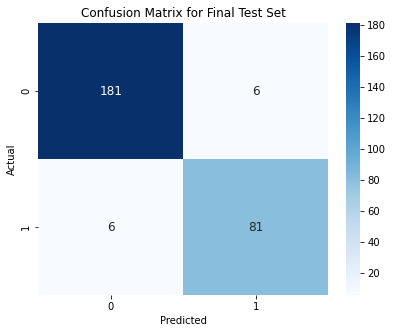

In [397]:
# Print the Confusion Matrix using a Heatmap for the final test set
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Final Test Set')
plt.show()